__

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [6]:
df.shape

(10000, 11)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Note:  I an not doing the visualization here as I already done in another notebook. just applying ANN here

In [9]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [13]:
df['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [14]:
df['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [15]:
df = pd.get_dummies(df,columns=['Gender','Geography'],drop_first=True)

In [16]:
X = df.drop(columns='Exited')
y = df['Exited']

In [17]:
X.shape

(10000, 11)

# Preprocessing of Data
- Train | Test Split, Scalling

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [22]:
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,ReLU

In [23]:
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=11)) # hidden layer1(10 neurons) with 11 input layers
# model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=5,activation='relu')) # hidden layer 2 (5 neurons)
# model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=1,activation='sigmoid')) # output layer (1)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=2,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [27]:
history = model.fit(X_train,y_train, epochs =200,validation_split=0.2, callbacks=early_stopping)

Epoch 1/200
200/200 [==============================] - 3s 8ms/step - loss: 0.5756 - accuracy: 0.7503 - val_loss: 0.4983 - val_accuracy: 0.8000
Epoch 2/200
200/200 [==============================] - 1s 4ms/step - loss: 0.4845 - accuracy: 0.7959 - val_loss: 0.4458 - val_accuracy: 0.8087
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4430 - accuracy: 0.8109 - val_loss: 0.4181 - val_accuracy: 0.8294
Epoch 4/200
200/200 [==============================] - 1s 3ms/step - loss: 0.4184 - accuracy: 0.8233 - val_loss: 0.4036 - val_accuracy: 0.8388
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8339 - val_loss: 0.3942 - val_accuracy: 0.8400
Epoch 6/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3890 - accuracy: 0.8453 - val_loss: 0.3865 - val_accuracy: 0.8431
Epoch 7/200
200/200 [==============================] - 1s 3ms/step - loss: 0.3788 - accuracy: 0.8483 - val_loss: 0.3799 - val_accuracy: 0.8494

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [28]:
# prediction
y_log = model.predict(X_test)
# note: we are using sigmoid, so real will be in 0 to 1

63/63 [==============================] - 0s 1ms/step


In [29]:
y_pred = np.where(y_log>0.5,1,0) # this means if y_log > 0.5 then 1 else 0

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [31]:
accuracy_score(y_test,y_pred)

0.856

In [32]:
confusion_matrix(y_test,y_pred)

array([[1536,   71],
       [ 217,  176]])

In [33]:
import matplotlib.pyplot as plt

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [35]:
for i in history.history:
    print(i,history.history[i],'\n')

loss [0.5756456255912781, 0.48445138335227966, 0.44301894307136536, 0.4183676838874817, 0.4019562602043152, 0.38898900151252747, 0.37884968519210815, 0.3702349066734314, 0.3638439178466797, 0.3590397536754608, 0.35502028465270996, 0.3519318699836731, 0.3497275412082672, 0.3476250469684601, 0.34637877345085144, 0.34493401646614075, 0.3441395163536072, 0.34315013885498047, 0.3417526185512543, 0.34122753143310547, 0.34071147441864014, 0.33935317397117615, 0.3390848636627197, 0.33835381269454956, 0.3380662500858307, 0.33744800090789795, 0.33694449067115784, 0.33624744415283203, 0.33609265089035034, 0.3357490599155426, 0.33559733629226685, 0.33517882227897644, 0.33459582924842834, 0.334605872631073, 0.3344363868236542, 0.33452701568603516, 0.3337510824203491, 0.3339899480342865, 0.33346596360206604, 0.33368155360221863, 0.33323803544044495, 0.3330853581428528, 0.33295580744743347, 0.3327654302120209, 0.3326560854911804, 0.3325752317905426, 0.3321906328201294, 0.33216628432273865, 0.33212223

Text(0.5, 1.0, 'Model Accuracy History')

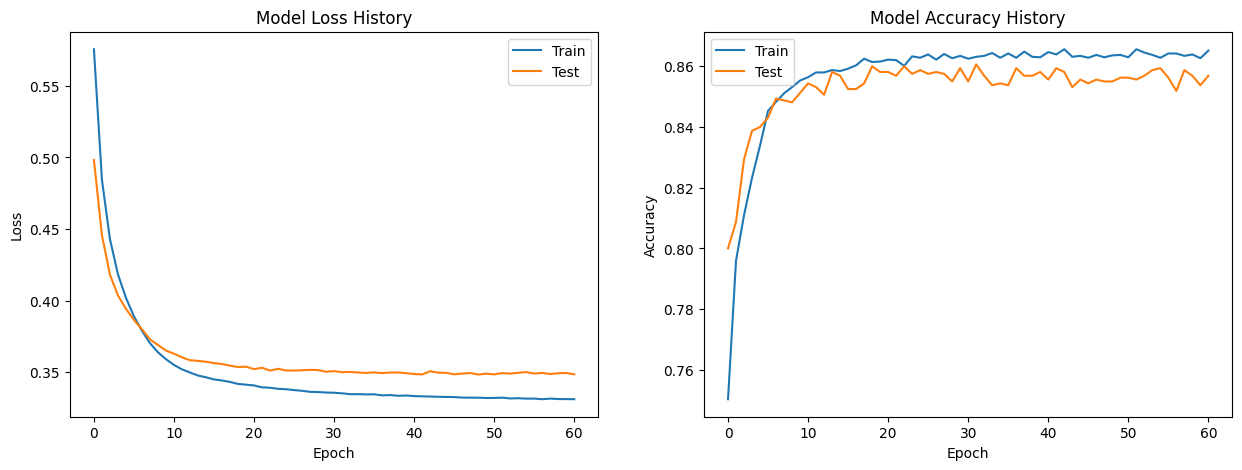

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss History')

plt.subplot(122)
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy History')

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [37]:
# Changing class weights

from sklearn.utils import compute_class_weight

class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.6293266205160478, 1: 2.4330900243309004}

In [38]:
model2 = Sequential()
model2.add(Dense(units=10,activation='relu',input_dim=11)) # hidden layer1(10 neurons) with 11 input layers
# model2.add(Dense(units=8,activation='relu'))
model2.add(Dense(units=5,activation='relu')) # hidden layer 2 (5 neurons)
# model2.add(Dense(units=3,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid')) # output layer (1)

In [39]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model2.compile(optimizer = 'Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [41]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=2,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [42]:
history = model2.fit(X_train,y_train, epochs =200,validation_split=0.2, callbacks=early_stopping, class_weight=class_weights)

Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.7148 - accuracy: 0.6361 - val_loss: 0.6461 - val_accuracy: 0.6094
Epoch 2/200
200/200 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.6366 - val_loss: 0.6034 - val_accuracy: 0.6656
Epoch 3/200
200/200 [==============================] - 1s 3ms/step - loss: 0.6101 - accuracy: 0.6755 - val_loss: 0.5869 - val_accuracy: 0.6800
Epoch 4/200
200/200 [==============================] - 1s 3ms/step - loss: 0.5833 - accuracy: 0.6861 - val_loss: 0.5696 - val_accuracy: 0.6981
Epoch 5/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7023 - val_loss: 0.5718 - val_accuracy: 0.7013
Epoch 6/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5503 - accuracy: 0.7130 - val_loss: 0.5532 - val_accuracy: 0.7169
Epoch 7/200
200/200 [==============================] - 0s 2ms/step - loss: 0.5372 - accuracy: 0.7237 - val_loss: 0.5356 - val_accuracy: 0.7275

In [43]:
# prediction
y_log = model2.predict(X_test)
# note: we are using sigmoid, so real will be in 0 to 1

63/63 [==============================] - 0s 1ms/step


In [44]:
y_pred = np.where(y_log>0.5,1,0) # this means if y_log > 0.5 then 1 else 0

In [45]:
accuracy_score(y_test,y_pred)

0.7605

In [46]:
confusion_matrix(y_test,y_pred)

array([[1227,  380],
       [  99,  294]])

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
for i in history.history:
    print(i,history.history[i],'\n')

loss [0.7148268222808838, 0.6455080509185791, 0.6100640296936035, 0.5832975506782532, 0.5651432275772095, 0.5502540469169617, 0.5371506214141846, 0.5241169929504395, 0.5123528242111206, 0.502471923828125, 0.4937436580657959, 0.48672565817832947, 0.4819246530532837, 0.47874915599823, 0.4756139814853668, 0.47336673736572266, 0.4719682037830353, 0.4697802662849426, 0.4696944057941437, 0.46750861406326294, 0.4678870141506195, 0.4659346640110016, 0.46591925621032715, 0.46512994170188904, 0.4650091826915741, 0.46310365200042725, 0.4628799855709076, 0.46225491166114807, 0.46228349208831787, 0.46100014448165894, 0.46114209294319153, 0.4605391323566437, 0.4601321816444397, 0.45978179574012756, 0.45982903242111206, 0.4593489468097687, 0.45830386877059937, 0.45839619636535645, 0.45765072107315063, 0.45845749974250793, 0.45724326372146606, 0.4573790431022644, 0.4566342532634735, 0.4566112458705902, 0.4557623565196991, 0.45633044838905334, 0.4553104639053345, 0.4557453393936157, 0.4554378092288971,

Text(0.5, 1.0, 'Model Accuracy History')

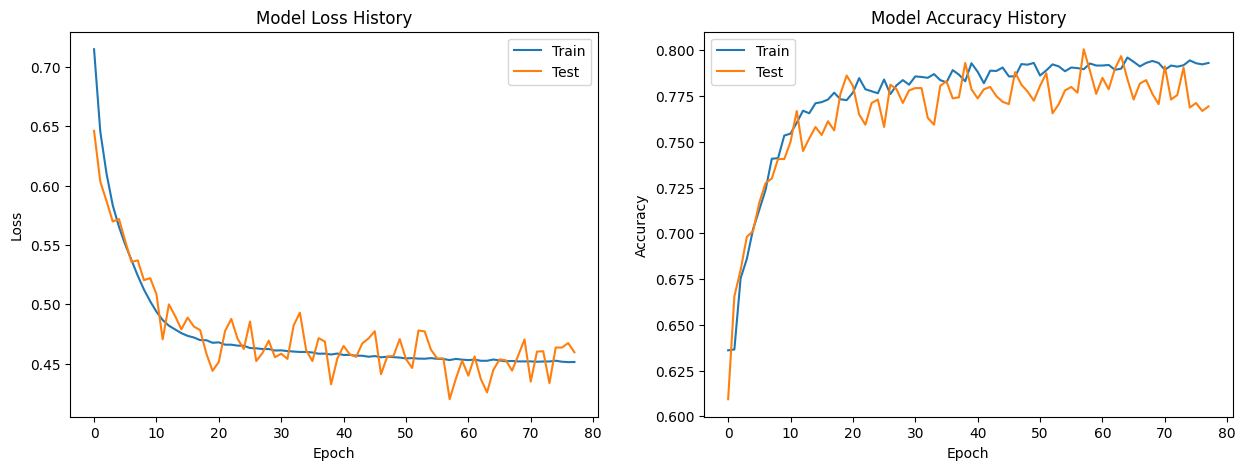

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(history.history['loss'],label='Train')
plt.plot(history.history['val_loss'],label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss History')

plt.subplot(122)
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy History')

# Final Model and Model Deployment

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

# save model
model.save('best_model.h5')
print('Model Saved!')

# load model
savedModel=load_model('best_model.h5')
savedModel.summary()

Model Saved!
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181 (724.00 Byte)
Trainable params: 181 (724.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Prediction

In [54]:
savedModel.predict(X_test)

63/63 [==============================] - 0s 2ms/step


array([[0.03774887],
       [0.03769207],
       [0.08485562],
       ...,
       [0.63824314],
       [0.07999431],
       [0.2728703 ]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___